In [1]:
import pandas as pd

dataset = pd.read_csv('archive/NationalNames.csv')

In [2]:
print('Output the first 8 rows of the dataset')
dataset[0:8]

Output the first 8 rows of the dataset


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [3]:
print('Output the last 8 rows of the dataset')
print(dataset[-8:])

Output the last 8 rows of the dataset
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [4]:
print('Get the names of dataset columns')
print(dataset.columns)

Get the names of dataset columns
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [5]:
print('Get general information about data in the dataset')
print(dataset.describe())

Get general information about data in the dataset
                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


In [6]:
print('Find the number of unique names in whole dataset')
print(dataset.nunique()['Name'])

Find the number of unique names in whole dataset
93889


In [7]:
print('Calculate the number of unique female and male names in whole dataset')
print(dataset.groupby('Gender').nunique()['Name'])

Calculate the number of unique female and male names in whole dataset
Gender
F    64911
M    39199
Name: Name, dtype: int64


In [8]:
print('Find 5 the most popular male names in 2010')
print(dataset[(dataset['Year'] == 2010) & (dataset['Gender'] == 'M')].sort_values('Count', ascending=False)[0:5])

Find 5 the most popular male names in 2010
              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


In [9]:
print('Find the most popular name based on the results of one year (the name for which Count is maximum)')
print(dataset.sort_values('Count', ascending=False)[0:1])

Find the most popular name based on the results of one year (the name for which Count is maximum)
            Id   Name  Year Gender  Count
431052  431053  Linda  1947      F  99680


In [10]:
print('Count the number of records with Count = minimum')
print(dataset.where(dataset['Count'] == dataset['Count'].min()).count().iloc()[0])

Count the number of records with Count = minimum
254615


In [11]:
print('Count the number of unique names in each year')
print(dataset.groupby('Year')[['Name']].nunique())

Count the number of unique names in each year
       Name
Year       
1880   1889
1881   1830
1882   2012
1883   1962
1884   2158
...     ...
2010  31603
2011  31418
2012  31236
2013  30774
2014  30579

[135 rows x 1 columns]


In [12]:
print('Find the year with the most number of unique names.')
print(dataset.groupby('Year').nunique().sort_values('Count', ascending=False)[0:1])

Find the year with the most number of unique names.
         Id   Name  Year  Gender  Count
Year                                   
2007  34931  32400     1       2   1391


In [13]:
print('Find most popular name of the year with the most number of unique names(that is in 2008)')
print(dataset[(dataset.Year == 2008)].sort_values('Count', ascending=False)[0:1].iloc()[0])

Find most popular name of the year with the most number of unique names(that is in 2008)
Id        1608303
Name        Jacob
Year         2008
Gender          M
Count       22568
Name: 1608302, dtype: object


In [14]:
print('Find the year when the name “Jacob” was the most popular as a female name')
dataset[(dataset.Name == 'Jacob') & (dataset.Gender == 'F')].sort_values('Count', ascending=False)[0:1]

Find the year when the name “Jacob” was the most popular as a female name


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [15]:
print('Find year, with the most number of gender neutral names (the same male and female names)')
dataset.groupby(['Year', 'Name', 'Gender']).sum().unstack().dropna().groupby(['Year']).count().unstack().max()

Find year, with the most number of gender neutral names (the same male and female names)


2557

In [16]:
print('Find total births per year')
print(dataset.groupby('Year').sum()['Count'])

Find total births per year
Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [17]:
print('Find the year when the greatest number of children was born ')
df = dataset.groupby('Year').sum()
df.index[df.Count == df.max().Count].tolist()[0]

Find the year when the greatest number of children was born 


1957

In [18]:
print('Find the number of girls and boys that were born in each year')
df = dataset.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(df)

Find the number of girls and boys that were born in each year
Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [19]:
print('Count the number of years when more girls were born than boys')
table = dataset.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(table[table.F > table.M].count())

Count the number of years when more girls were born than boys
Gender
F    54
M    54
dtype: int64


Draw the plot of total births per year of boys and girls


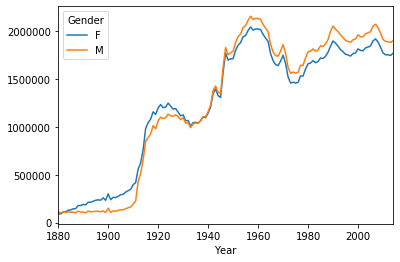

In [20]:
print('Draw the plot of total births per year of boys and girls')
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [21]:
print('Count number of gender neutral names (same for girls and boys)')
print(dataset.groupby(['Name', 'Gender']).sum().unstack().dropna().count()['Count'])

Count number of gender neutral names (same for girls and boys)
Gender
F    10221
M    10221
dtype: int64


In [22]:
print('Count how much times boys were named as Barbara')
print(dataset[(dataset.Name == 'Barbara') & (dataset.Gender == 'M')]['Count'].sum())

Count how much times boys were named as Barbara
4139


In [23]:
print('Create 2 conditions for data analyzing of this dataset on your own and implement them.')

print('Most popular name in 2000-2005, 2005-2010, 2010+')
print(dataset[(2000 <= dataset['Year']) & (dataset['Year'] <= 2005)].sort_values('Count', ascending=False)[0:1])
print(dataset[(2005 < dataset['Year']) & (dataset['Year'] <= 2010)].sort_values('Count', ascending=False)[0:1])
print(dataset[(2010 < dataset['Year'])].sort_values('Count', ascending=False)[0:1])

print('How many Richards were born in 2001')
print(dataset[(dataset.Name == 'Richard') & (dataset.Year == 2001)].groupby(['Year', 'Gender'])['Count'].sum().unstack())

Create 2 conditions for data analyzing of this dataset on your own and implement them.
Most popular name in 2000-2005, 2005-2010, 2010+
              Id   Name  Year Gender  Count
1350190  1350191  Jacob  2000      M  34465
              Id   Name  Year Gender  Count
1538906  1538907  Jacob  2006      M  24830
              Id    Name  Year Gender  Count
1725502  1725503  Sophia  2012      F  22267
How many Richards were born in 2001
Gender   F     M
Year            
2001    11  5767


In [41]:
df = dataset.groupby(['Name', 'Gender']).sum().unstack().dropna()['Count']
values = df.index.values
if 'Illya' in values:
    print(df.loc['Illya'].sum())
else:
    print('No')

385.0
